In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams.update({'font.size': 14})
import seaborn as sns

In [28]:
x_axis = [1, 2, 4, 8, 12, 26, 36, 48, 64]
sequential = [6402.502, 6402.407, 6402.974, 6404.214, 6406.059, 6406.782, 6406.886, 6407.805, 6409.816]
fastflow_sub = [6440.741, 3241.22, 1643.007, 851.087, 656.407, 411.027, 356.788, 396.953, 353.969]
fastflow_proc = [6411.85, 3208.395, 1610.48, 815.614, 616.631, 353.219, 283.054, 281.344, 274.334]
ms = 100
n_tasks = 64
target = [(ms * n_tasks)/i for i in x_axis]

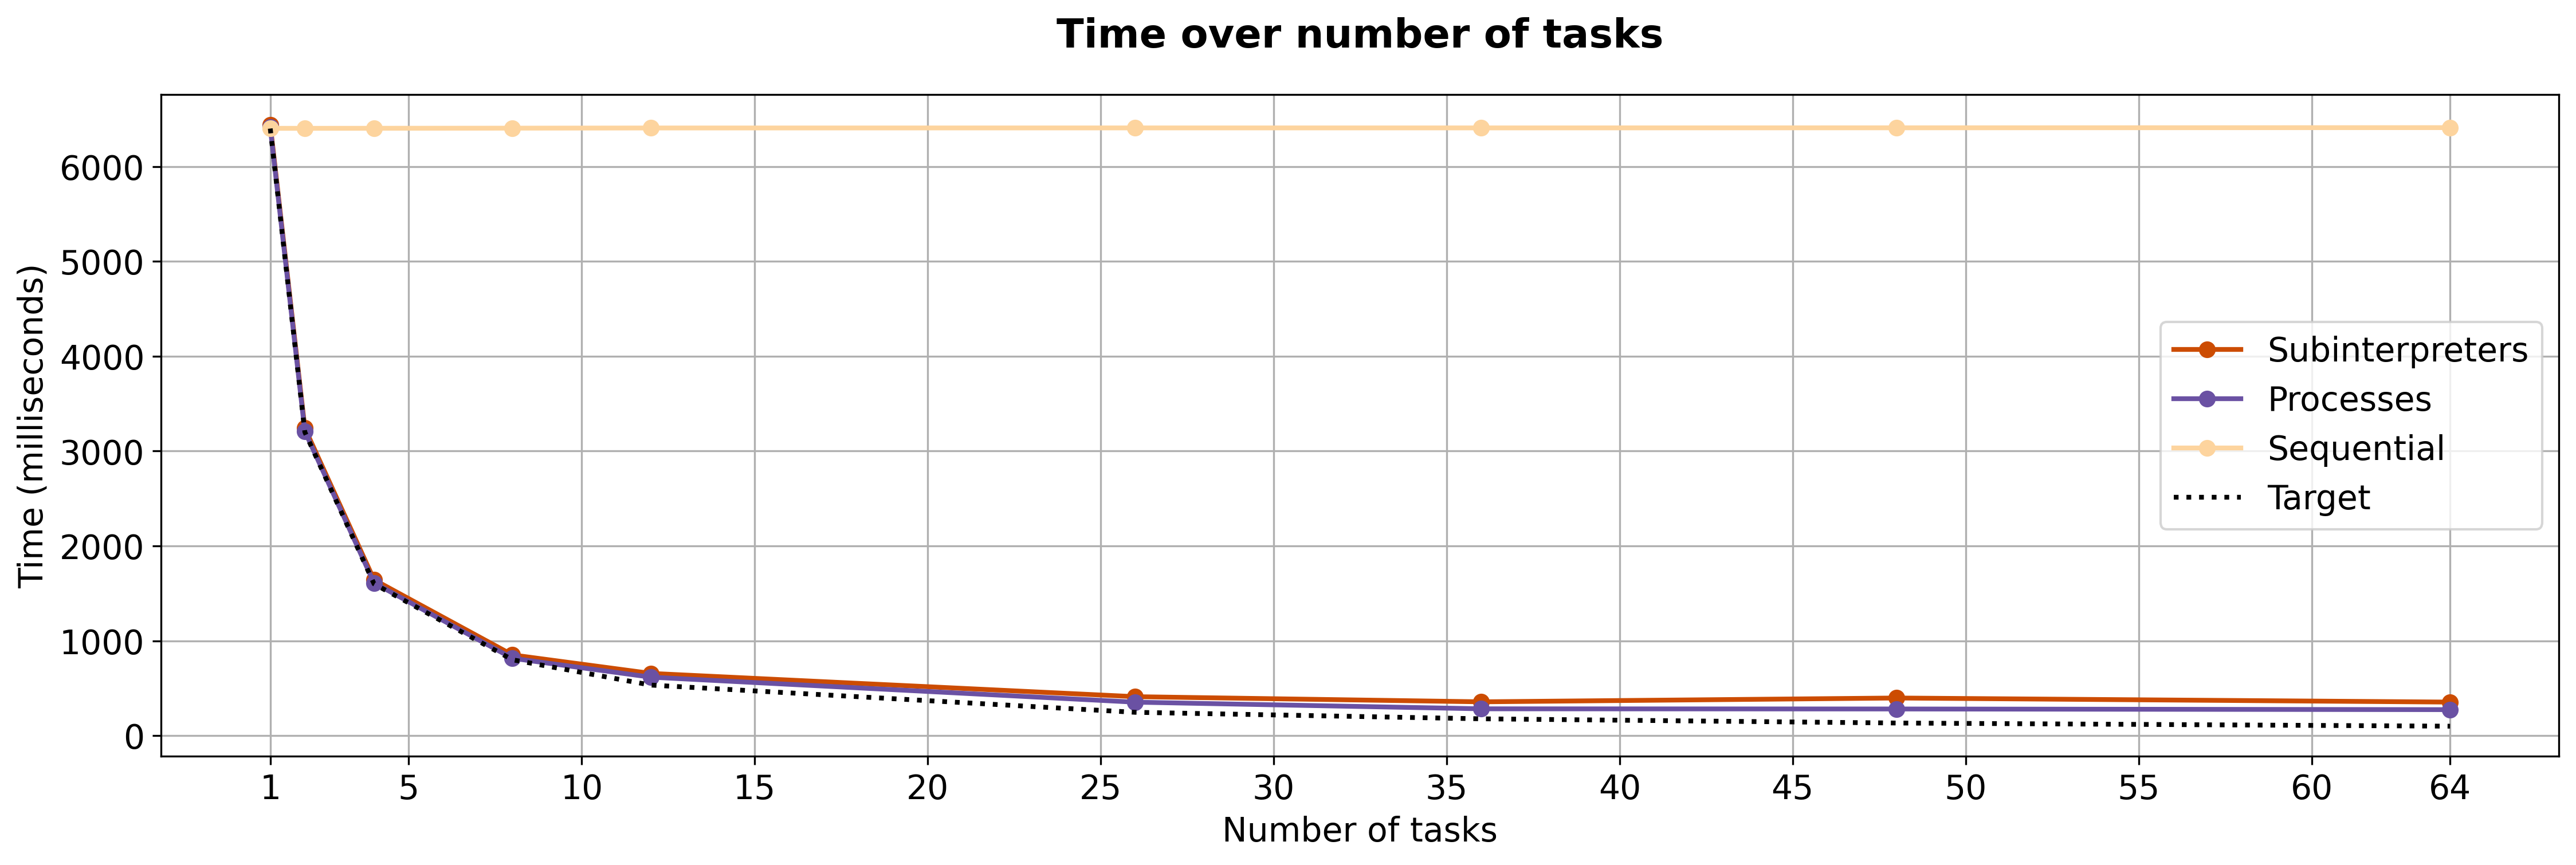

In [31]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
colors = ["#fdd49e", "#fc8d59", "#cc4c02", "#6a51a3"]
linewidth = 2
style = 'o-'
plt.plot(x_axis, fastflow_sub, style, label="Subinterpreters", linewidth=linewidth, color=colors[2])
plt.plot(x_axis, fastflow_proc, style, label="Processes", linewidth=linewidth, color=colors[3])
plt.plot(x_axis, sequential, style, label="Sequential", linewidth=linewidth, color=colors[0])
plt.plot(x_axis, target, ls="dotted", label="Target", linewidth=linewidth, color="black")

axs.set_xlabel("Number of tasks")
axs.set_ylabel("Time (milliseconds)")
axs.grid()
# Setting the number of ticks
#axs.xaxis.set_major_locator(ticker.MultipleLocator(5))
xticks = [1]
for i in range(5, x_axis[-1], 5):
    xticks.append(i)
if xticks[-1] != x_axis[-1]:
    xticks.append(x_axis[-1])
plt.xticks(xticks, labels=xticks)
#axs.yaxis.set_major_locator(ticker.MultipleLocator(2))
axs.yaxis.set_major_formatter(ticker.ScalarFormatter())
axs.yaxis.set_minor_formatter(ticker.ScalarFormatter())
axs.tick_params(which='minor', length=0)

plt.title('Time over number of tasks', fontweight="bold", y=1.05)
plt.legend()
plt.savefig("sequential", bbox_inches="tight")
plt.show()